In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

In [2]:
import pandas as pd

# Read in data and assign X and y
data = pd.read_csv('../data/Milestone2_data/Q2_train_data.csv', index_col=0)
print(data.columns)
print(data[['distance', 'angle' ]])
print(data.head())
print(data.tail())

Index(['gameID', 'distance', 'angle', 'isGoal', 'emptyNet'], dtype='object')
          distance    angle
0        13.000000  22.6199
1        13.341664  77.0054
2       118.270876 -18.7413
3        57.974132 -14.9951
4        61.717096  26.9802
...            ...      ...
327249   38.418745 -38.6598
327250    8.544004  20.5560
327251   55.326305  -6.2258
327252   58.855756   9.7824
327253   12.000000   0.0000

[327254 rows x 2 columns]
       gameID    distance    angle  isGoal  emptyNet
0  2016020001   13.000000  22.6199       0         0
1  2016020001   13.341664  77.0054       0         0
2  2016020001  118.270876 -18.7413       0         0
3  2016020001   57.974132 -14.9951       0         0
4  2016020001   61.717096  26.9802       0         0
            gameID   distance    angle  isGoal  emptyNet
327249  2019030416  38.418745 -38.6598       0         0
327250  2019030416   8.544004  20.5560       0         0
327251  2019030416  55.326305  -6.2258       0         0
327252  201903

In [12]:
wandb.login()

True

In [14]:
# Initialize WandB
wandb.init(
    project="IFT6758.2024-A04",  
    job_type="logistic-regression",
    name="Logistic Regression")

CommError: Run initialization has timed out after 90.0 sec. Please try increasing the timeout with the `init_timeout` setting: `wandb.init(settings=wandb.Settings(init_timeout=120))`.

In [11]:
#Train Model

import wandb
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

# Initialize WandB
wandb.init(
    project="IFT6758.2024-A04",  
    job_type="logistic-regression",
    name="Logistic Regression")

# Configuration (hyperparameters)
config = wandb.config

# Split the data into features and labels
X = data[["distance", "angle"]]
y = data["isGoal"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config.test_size, random_state=config.random_state)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Log metrics to WandB
wandb.log({"accuracy": accuracy, "roc_auc": roc_auc})

# Save the model locally
model_path = "logistic_regression.pkl"
joblib.dump(model, model_path)

# Log the model as an artifact
artifact = wandb.Artifact("expected-goal-model", type="model")
artifact.add_file(model_path)
wandb.log_artifact(artifact)

# Finish the WandB run
wandb.finish()

print(f"Model trained and logged to WandB with accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}")


CommError: Run initialization has timed out after 90.0 sec. Please try increasing the timeout with the `init_timeout` setting: `wandb.init(settings=wandb.Settings(init_timeout=120))`.

## Question 1: Logitique regression

In [3]:
def Reg_log(X, y, liste_caracteristiques):
    '''
    Arguments :
    X = pd.DataFrame X
    y = étiquettes cibles
    liste_caracteristiques = liste des caractéristiques
    '''
    # Affiche les caractéristiques sélectionnées dans X
    # Supprime les lignes avec des valeurs manquantes dans la ou les caractéristiques sélectionnées
    X_filtre = X[liste_caracteristiques].dropna()
    y_filtre = y.loc[X_filtre.index]  # Aligne `y` avec `X_filtre`

    # Exécute la fonction de régression logistique
    X_train, X_val, y_train, y_val = train_test_split(X_filtre[liste_caracteristiques], y_filtre, test_size=0.2, random_state=42)

    # Ajustement du modèle de régression logistique
    clf = LogisticRegression()
    y_train = y_train.values.ravel()
    clf.fit(X_train, y_train)
    
    # Prédiction sur l'ensemble de validation
    y_pred = clf.predict(X_val)
    precision = metrics.accuracy_score(y_val, y_pred)
    print(f"Précision sur l'ensemble de validation : {precision:.2f}")
    
    # Probabilités de prédiction
    pred_probs = clf.predict_proba(X_val)
    
    return X_val, y_val, y_pred, precision, pred_probs

In [4]:
X= data[['distance', 'angle' ]]
y = data[['isGoal']]

In [5]:
# Appel pour la première caractéristique 'distanceFromNet':
X_val_1, y_val_1, y_pred_1, accuracy_1, pred_probs_1 = Reg_log(X, y, liste_caracteristiques=['distance'])


# Appel pour la deuxième caractéristique 'angleFromNet':
X_val_2, y_val_2, y_pred_2, accuracy_2, pred_probs_2 = Reg_log(X, y, liste_caracteristiques=['angle'])


print(accuracy_1)
print(accuracy_2)

print(pred_probs_1)
print(pred_probs_2)

Précision sur l'ensemble de validation : 0.90
Précision sur l'ensemble de validation : 0.90
0.9035003284900154
0.9035003284900154
[[0.95994204 0.04005796]
 [0.95200613 0.04799387]
 [0.93677541 0.06322459]
 ...
 [0.87501241 0.12498759]
 [0.86831846 0.13168154]
 [0.95277493 0.04722507]]
[[0.90707146 0.09292854]
 [0.90729952 0.09270048]
 [0.90458408 0.09541592]
 ...
 [0.90568173 0.09431827]
 [0.90714505 0.09285495]
 [0.90501568 0.09498432]]


In [6]:

def tracer_roc_toutes_caracteristiques(X, y):
    # Initialize WandB logging
    run = wandb.init(project="hockey_shot_prediction", name="roc_curves_all_features", tags=["roc_curve"])
    
    fig = plt.figure(figsize=(12, 10))
    
    liste_caracteristiques = (['distance'], ['angle'], ['distance', 'angle']  )
    liste_couleurs = ['orange', 'violet', 'cyan']
    liste_libelles = ['Distance du Filet', 'Angle du Filet', 'Distance et Angle du Filet']
    
    for i, caracteristique in enumerate(liste_caracteristiques):
        X_val, y_val, y_pred, precision, pred_probs = Reg_log(X, y, caracteristique)           
        print(f'Précision : {precision}')
            
        couleur_trace = liste_couleurs[i]
        libelle_trace = liste_libelles[i]
            
        probas_but = pred_probs[:, 1]
        fpr, tpr, _ = roc_curve(y_val, probas_but)
        roc_auc = auc(fpr, tpr)
            
        plt.plot(fpr, tpr, color=couleur_trace, label=f'{libelle_trace} ' + 'AUC = %0.2f' % roc_auc, lw=2)

        # Log ROC curve to WandB
        wandb.log({f"roc_{libelle_trace}": wandb.plot.roc_curve(y_val, pred_probs, labels=["Non-But", "But"])
                  })
        
    # Ligne de référence aléatoire
    baseline_aleatoire = np.random.uniform(0, 1, probas_but.shape[0])
    couleur_trace = 'grey'
    libelle_trace = 'Référence Aléatoire'
    fpr, tpr, _ = roc_curve(y_val, baseline_aleatoire)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=couleur_trace, label=f'{libelle_trace} ' + 'AUC = %0.2f' % roc_auc, lw=2)
    
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    plt.title('Courbes ROC', fontsize=20)
    plt.legend(loc=2, prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.ylabel('Taux de Vrais Positifs', fontsize=20)
    plt.xlabel('Taux de Faux Positifs', fontsize=20)    
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('2-3-3a_courbes_ROC.png')
    plt.show()
    
    # Finish the WandB run
    run.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: thalia-cantero (thalia-cantero-udem). Use `wandb login --relogin` to force relogin


Précision sur l'ensemble de validation : 0.90
Précision : 0.9035003284900154
Précision sur l'ensemble de validation : 0.90
Précision : 0.9035003284900154


wandb: WARNING wandb uses only 10000 data points to create the plots.


Précision sur l'ensemble de validation : 0.90
Précision : 0.9035003284900154


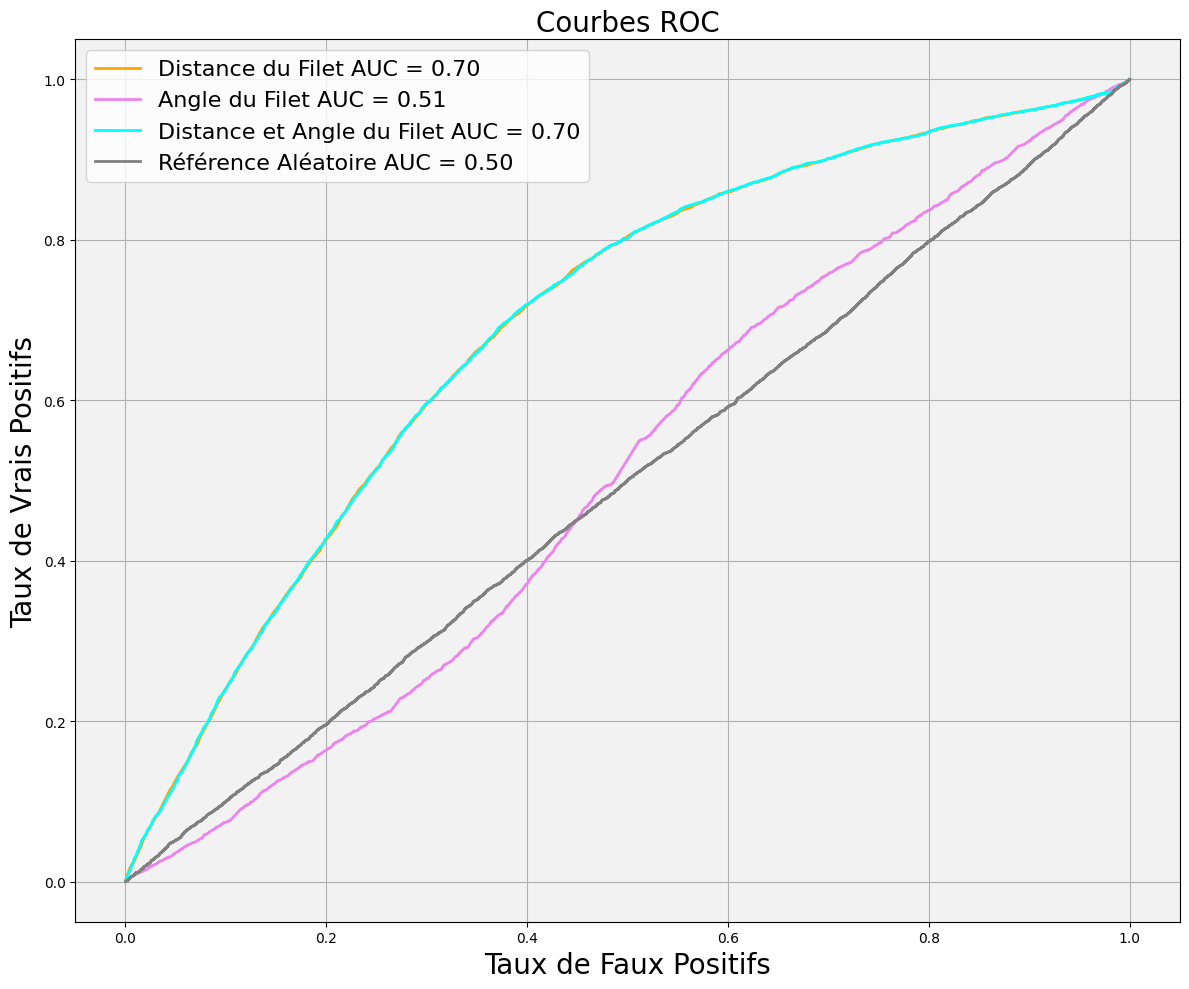

In [7]:
import wandb
import os
api_key = os.environ.get("WANDB_API_KEY")
tracer_roc_toutes_caracteristiques(X,y)

In [8]:
def calc_percentile(pred_probs, y_val):
    # Créer un DataFrame pour les probabilités de tir
    df_probs = pd.DataFrame(pred_probs)
    df_probs = df_probs.rename(columns={0: "Not_Goal_prob", 1: "Goal_prob"})
    
    # Combiner la probabilité de but avec la colonne "isGoal"
    df_probs = pd.concat([df_probs["Goal_prob"].reset_index(drop=True), y_val["isGoal"].reset_index(drop=True)], axis=1)
    
    # Calculer et ajouter une colonne pour les percentiles
    percentile_values = df_probs['Goal_prob'].rank(pct=True)
    df_probs['Percentile'] = percentile_values * 100
    df_percentile = df_probs.copy()
    
    return df_percentile

In [9]:
def goal_rate(df_percentile):
    rate_list = []
    
    # Trouver le nombre total de buts
    total_goals = df_percentile['isGoal'].value_counts()[1]
    
    bin_width = 5
    i = 0
    i_list = []
    
    while i < (100 - bin_width + 1):  # 95 est la borne inférieure du dernier bin
        i_list.append(i)

        # Taille du bin de i
        bin_lower_bound = i
        bin_upper_bound = i + bin_width

        # Trouver les lignes avec des percentiles dans cette plage
        bin_rows = df_percentile[(df_percentile['Percentile'] >= bin_lower_bound) & (df_percentile['Percentile'] < bin_upper_bound)]
        
        # Calculer le taux de buts en fonction du nombre total de buts et de tirs dans chaque bin
        goals = bin_rows['isGoal'].value_counts()[1]      
        shots = len(bin_rows)  # Nombre total de tirs dans bin_rows
        rate = (goals / shots) * 100  # Taux de buts en pourcentage

        rate_list.append(rate)

        i += bin_width
    
    # Créer un DataFrame combinant le taux de buts et les percentiles
    goal_rate_df = pd.DataFrame(list(zip(rate_list, i_list)), columns=['Rate', 'Percentile'])
    
    return goal_rate_df

In [10]:
def tracer_taux_de_buts(X, y):
    fig = plt.figure(figsize=(12, 10))
    
    # Liste des caractéristiques, couleurs et étiquettes de tracé
    liste_caracteristiques = (['distance'], ['angle'], ['distance', 'angle'])
    liste_couleurs = ['orange', 'violet', 'cyan']
    liste_labels = ['Distance du Filet', 'Angle du Filet', 'Distance et Angle du Filet']
    
    for i, caracteristique in enumerate(liste_caracteristiques):
        X_val, y_val, y_pred, precision, probas_pred = Reg_log(X, y, caracteristique)   
        print(f'Score de précision : {precision}')
            
        couleur_trace = liste_couleurs[i]
        etiquette_trace = liste_labels[i]
            
        df_percentile = calc_percentile(probas_pred, y_val)
        df_taux_de_buts = goal_rate(df_percentile)
        taux_x = df_taux_de_buts['Percentile']
        taux_y = df_taux_de_buts['Rate']
        plt.plot(taux_x, taux_y, color=couleur_trace, label=f'{etiquette_trace}')
        
    # Baseline aléatoire
    probas_est_but = probas_pred[:, 1]
    baseline_est_but = np.random.uniform(0, 1, probas_est_but.shape[0])
    baseline_pas_but = np.array([(1 - i) for i in baseline_est_but])
    probas_aleatoires = np.column_stack((baseline_est_but, baseline_pas_but))
    df_percentile = calc_percentile(probas_aleatoires, y_val)
    df_taux_de_buts = goal_rate(df_percentile)
    taux_x = df_taux_de_buts['Percentile']
    taux_y = df_taux_de_buts['Rate']
        
    couleur_trace = 'grey'
    etiquette_trace = 'Référence Aléatoire'
    plt.plot(taux_x, taux_y, color=couleur_trace, label=f'{etiquette_trace}')
            
    # Personnalisation du graphique
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    ax.set_ylim([0, 100])
    ax.set_xlim([0, 100])
    ax.invert_xaxis()
    major_ticks = np.arange(0, 110, 10)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    plt.title('Taux de Buts', fontsize=20)
    plt.xlabel('Centile du modèle de probabilité de tir', fontsize=16)
    plt.ylabel('Buts / (Tirs+Buts)%', fontsize=16)
    plt.legend(loc=2, prop={'size': 16})
    plt.tight_layout()
    plt.savefig('2-3-3b_taux_de_buts.png')
    plt.show()

        

In [11]:
X= data[['distance', 'angle' ]]
y = data[['isGoal']]

Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154
Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154
Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154


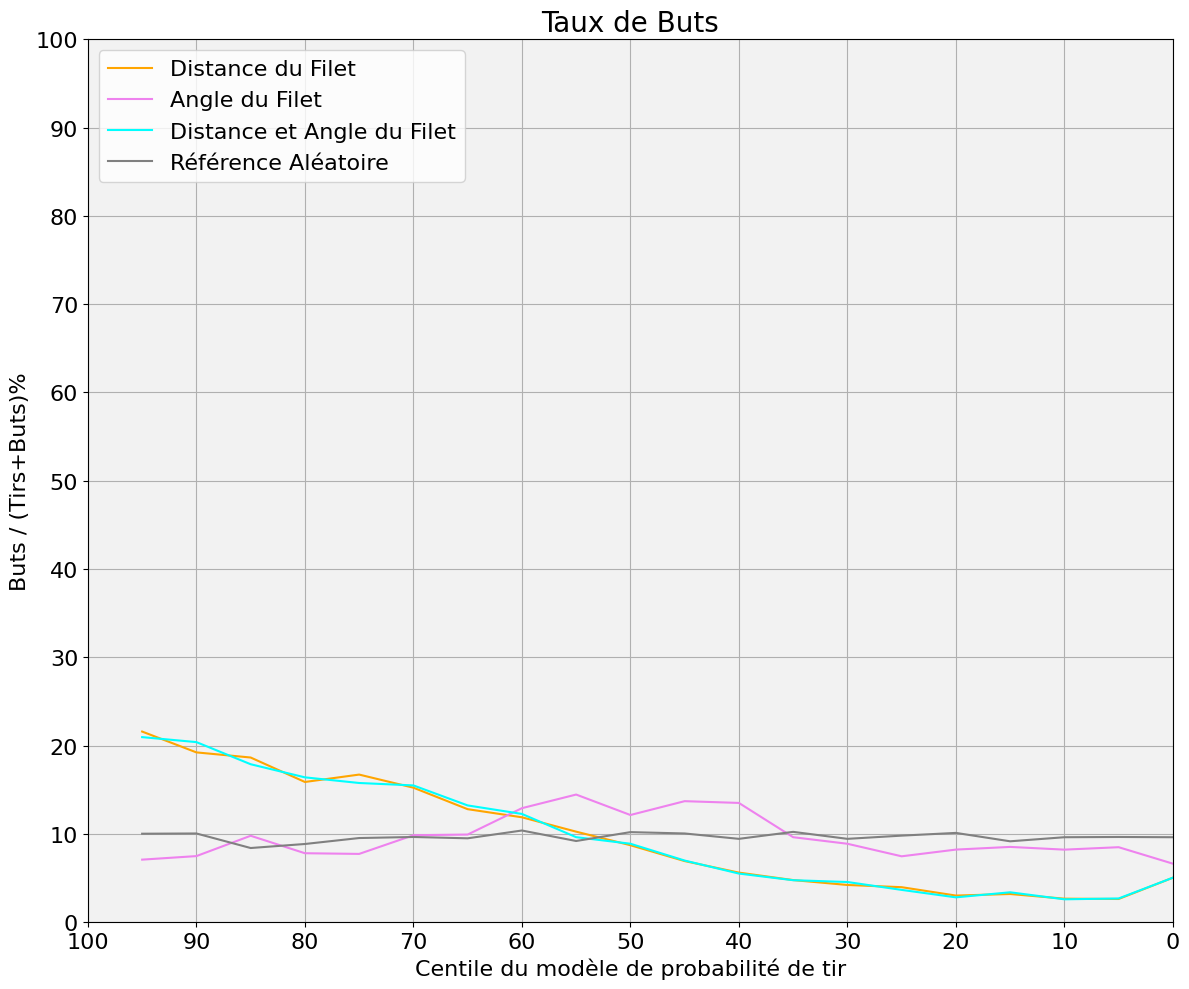

In [12]:
tracer_taux_de_buts(X,y)

In [13]:
def tracer_taux_cumulatif(X, y):
    fig = plt.figure(figsize=(12, 10))
    
    liste_caracteristiques = (['distance'], ['angle'], ['distance', 'angle'])
    liste_couleurs = ['orange', 'violet', 'cyan']
    liste_labels = ['Distance du Filet', 'Angle du Filet', 'Distance et Angle du Filet']
    
    for i, caracteristique in enumerate(liste_caracteristiques):
        X_val, y_val, y_pred, precision, probas_pred = Reg_log(X, y, caracteristique)   
        print(f'Score de précision : {precision}')
            
        couleur_trace = liste_couleurs[i]
        etiquette_trace = liste_labels[i]
            
        df_percentile = calc_percentile(probas_pred, y_val)
        df_percentile_buts_uniquement = df_percentile[df_percentile['isGoal'] == 1]
        ax = sns.ecdfplot(data=df_percentile_buts_uniquement, x=100 - df_percentile_buts_uniquement.Percentile, color=couleur_trace)
        
    # Baseline aléatoire
    probas_est_but = probas_pred[:, 1]
    baseline_est_but = np.random.uniform(0, 1, probas_est_but.shape[0])
    baseline_pas_but = np.array([(1 - i) for i in baseline_est_but])
    probas_aleatoires = np.column_stack((baseline_est_but, baseline_pas_but))
    df_percentile = calc_percentile(probas_aleatoires, y_val)
    df_percentile_buts_uniquement = df_percentile[df_percentile['isGoal'] == 1]
        
    couleur_trace = 'grey'
    etiquette_trace = 'Référence Aléatoire'
    ax = sns.ecdfplot(data=df_percentile_buts_uniquement, x=100 - df_percentile_buts_uniquement.Percentile, color=couleur_trace)
            
    # Personnalisation du graphique
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    plt.yticks(np.arange(0, 1.05, 0.1))
    plt.xticks(np.arange(0, 100 * 1.01, 10))
    xvals = ax.get_xticks()
    ax.set_xticklabels(100 - xvals.astype(int), fontsize=16)
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in yvals], fontsize=16)
    ax.set_xlabel('Centile du modèle de probabilité de tir', fontsize=16)
    ax.set_ylabel('Proportion', fontsize=16)
    ax.set_title("Pourcentage cumulatif de Buts", fontsize=20)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    liste_labels.append('Référence Aléatoire')
    plt.legend(labels=liste_labels, fontsize=16)
    plt.tight_layout()
    plt.savefig('2-3-3c_proportion_de_buts.png')
    plt.show()

Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154
Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154
Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154


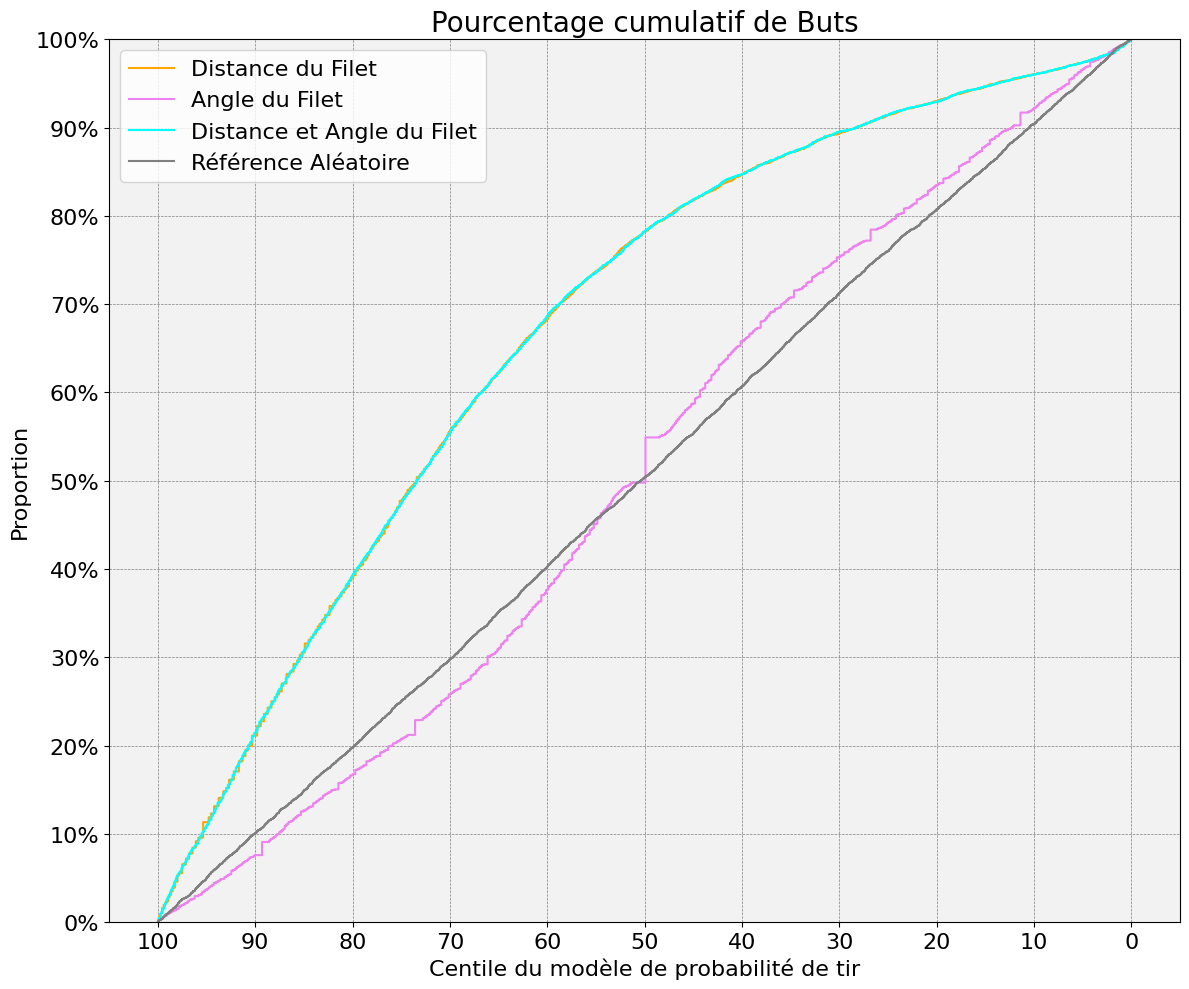

In [14]:
tracer_taux_cumulatif(X, y)

In [15]:
def tracer_calibration_toutes_chars(X, y):
    fig = plt.figure(figsize=(20, 20))
    gs = GridSpec(4, 3)

    ax_calibration_curve = fig.add_subplot(gs[:2, :2])
    
    liste_caracteristiques = [['distance'], ['angle'], ['distance', 'angle']]
    liste_couleurs = ['orange', 'violet', 'cyan']
    liste_labels = ['Distance du Filet', 'Angle du Filet', 'Distance et Angle du Filet']
    
    liste_caracteristiques.append('BaselineAleatoire')
    
    for i, caracteristique in enumerate(liste_caracteristiques):
            
        if caracteristique != 'BaselineAleatoire':
            X_val, y_val, y_pred, precision, probas_pred = Reg_log(X, y, caracteristique)   
            print(f'Score de précision : {precision}')
                
            y_val_est_but = y_val['isGoal']
            probas_pred_est_but = probas_pred[:, 1] 
            
            couleur_trace = liste_couleurs[i]
            etiquette_trace = liste_labels[i]
            
        else:
            probas_but_aleatoire = np.random.uniform(0, 1, len(y_val))
            
            y_val_est_but = y_val['isGoal']
            probas_pred_est_but = probas_but_aleatoire.copy()
            
            couleur_trace = 'magenta'
            etiquette_trace = 'Baseline Aléatoire'
            
        # Affichage du diagramme de calibration
        ax_display = CalibrationDisplay.from_predictions(y_val_est_but, probas_pred_est_but, n_bins=50, 
                                                         ax=ax_calibration_curve, color=couleur_trace, label=etiquette_trace)

    ax = plt.gca()
    ax.set_facecolor('0.95')
    ax_calibration_curve.grid()
    
    plt.title("Graphiques de calibration", fontsize=20)
    plt.legend(loc=2, prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.ylabel('Fraction de positifs', fontsize=20)
    plt.xlabel('Probabilité prédite moyenne', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'2-3-3d_graphiques_calibration.png')
    plt.show()

Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154
Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154
Précision sur l'ensemble de validation : 0.90
Score de précision : 0.9035003284900154


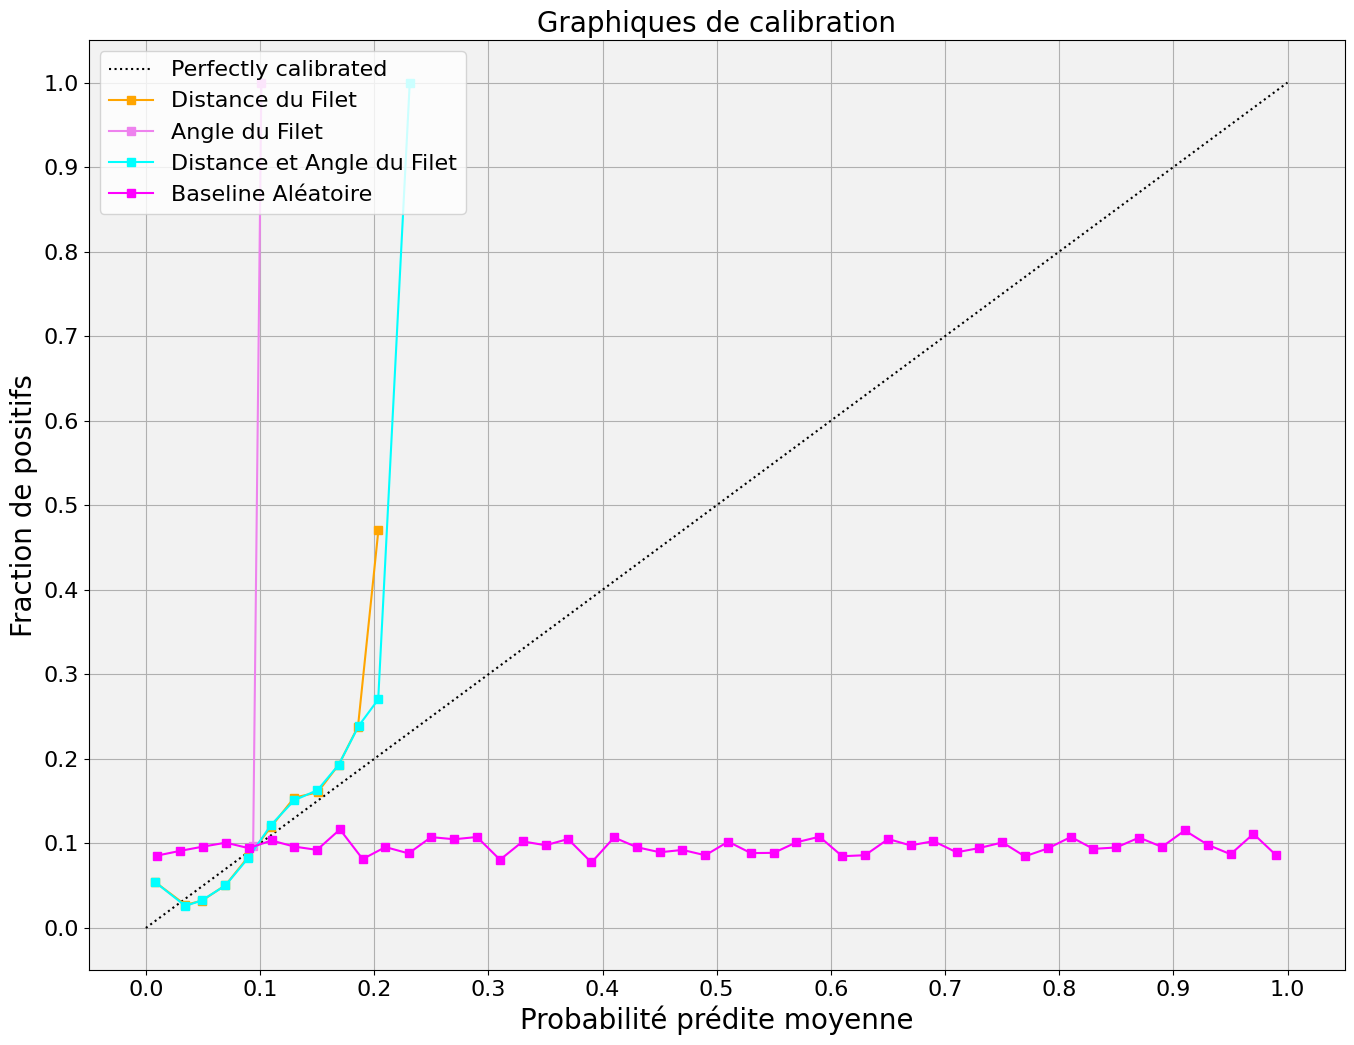

In [16]:
tracer_calibration_toutes_chars(X, y)


Initialisation avec wandb:

Le script utilise wandb.init pour démarrer un run avec un nom (run_name), des tags (tags), et un projet.
Journalisation des métriques dans wandb:

wandb.log est utilisé pour enregistrer des métriques comme l'accuracy, l'AUC, et la matrice de confusion.
Enregistrement des graphiques dans wandb:

Les courbes ROC et les diagrammes de calibration sont générés avec Matplotlib et enregistrés avec wandb.log.
Enregistrement du modèle dans wandb:

Le modèle est sauvegardé avec pickle et lié au run wandb avec wandb.save.

Boucle pour différents ensembles de caractéristiques:

Le code boucle sur trois configurations de caractéristiques : distance, angle, et les deux combinés.
Étapes pour exécuter le code :
Configurez votre clé API dans une variable d'environnement :


export WANDB_API_KEY="votre_clé_api"
Exécutez le script, et chaque modèle sera journalisé avec ses métriques et graphiques associés dans votre projet Weights & Biases.
Résultat attendu :
Trois runs wandb seront créés (un pour chaque ensemble de caractéristiques).
Les métriques (accuracy, AUC, etc.) et graphiques (ROC, calibration) seront disponibles dans l'interface wandb.
Les modèles sauvegardés (.pkl) seront également enregistrés comme artefacts wandb.

In [17]:
import wandb
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from plot_metrics import *

# Connexion à WandB (authentification via clé API)
wandb.login()

# Lecture des données
data = pd.read_csv('../data/Milestone2_data/Q2_train_data.csv', index_col=0)
X = data[['distance', 'angle']]
y = data[['isGoal']]

# Fonction pour entraîner, enregistrer et journaliser le modèle
def log_reg_experiment(X, y, features, feature_name):
    try:
        # Initialiser une expérience WandB
        run = wandb.init(
            project="Milestone2_Q3",  # Nom du projet
            entity="thalia-cantero-udem",  # Organisation ou utilisateur
            name=f"log_reg_{feature_name}",  # Nom de l'expérience
            tags=[feature_name],  # Tags pour organiser l'expérience
            settings=wandb.Settings(init_timeout=400)  # Timeout augmenté
        )

        # Nom dynamique pour le modèle
        experiment_name = f"log_reg_{feature_name}"

        # Sélection des caractéristiques
        X_selected = X[features]

        # Séparation des données
        X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

        # Entraînement du modèle
        clf = LogisticRegression()
        y_train = y_train.values.ravel()
        clf.fit(X_train, y_train)

        # Prédictions et probabilités
        y_pred = clf.predict(X_val)
        pred_probs = clf.predict_proba(X_val)

        # Évaluation du modèle
        accuracy = metrics.accuracy_score(y_val, y_pred)
        f1_score = metrics.f1_score(y_val, y_pred)
        precision = metrics.precision_score(y_val, y_pred)
        recall = metrics.recall_score(y_val, y_pred)
        cf_matrix = metrics.confusion_matrix(y_val, y_pred)
        probs_isgoal = pred_probs[:, 1]
        roc_auc = metrics.roc_auc_score(y_val, probs_isgoal)

        # Log des métriques dans WandB
        metrics_dict = {
            "accuracy": accuracy,
            "f1_score": f1_score,
            "precision": precision,
            "recall": recall,
            "roc_auc": roc_auc,
        }
        wandb.log(metrics_dict)

        # Enregistrement du modèle localement
        model_filename = f"{experiment_name}_model.pkl"
        pickle.dump(clf, open(model_filename, "wb"))

        # Enregistrement du modèle comme artefact dans WandB
        artifact = wandb.Artifact(
            name=f"{experiment_name}_model",  # Nom de l'artefact
            type="model",  # Type (ici, modèle)
            description=f"Logistic regression trained on {feature_name} features",
            metadata=metrics_dict  # Métadonnées pour inclure les métriques du modèle
        )
        artifact.add_file(model_filename)  # Ajouter le fichier du modèle
        run.log_artifact(artifact)  # Envoyer l'artefact à WandB
        print(f"Model artifact logged: {wandb.run.get_url()}")

        # Courbe ROC
        plot_ROC(y_val, pred_probs)
        wandb.log({"roc_curve": wandb.Image("roc_curve.png")})

        # Autres graphiques
        df_percentile = calc_percentile(pred_probs, y_val)
        goal_rate_df = goal_rate(df_percentile)
        plot_goal_rates(goal_rate_df)
        wandb.log({"goal_rate_plot": wandb.Image("goal_rate_plot.png")})

        plot_cumulative_goal_rates(df_percentile)
        wandb.log({"cumulative_goal_rate": wandb.Image("cumulative_goal_rate.png")})

        plot_calibration_curve_prediction(y_val, pred_probs)
        wandb.log({"calibration_curve": wandb.Image("calibration_curve.png")})

        # Fin de l'expérience
        run.finish()

        return pred_probs, accuracy, f1_score, precision, recall, roc_auc, cf_matrix

    except Exception as e:
        print(f"An error occurred: {e}")
        wandb.finish(exit_code=1)  # Signaler une fin prématurée en cas d'erreur


if __name__ == "__main__":
    # Expérience 1 : Distance
    pred_probs, accuracy, f1_score, precision, recall, roc_auc, cf_matrix = log_reg_experiment(
        X, y, features=['distance'], feature_name="distance"
    )
    print(accuracy, f1_score, precision, recall, roc_auc)
    print(cf_matrix)

    # Expérience 2 : Angle
    pred_probs, accuracy, f1_score, precision, recall, roc_auc, cf_matrix = log_reg_experiment(
        X, y, features=['angle'], feature_name="angle"
    )
    print(accuracy, f1_score, precision, recall, roc_auc)
    print(cf_matrix)

    # Expérience 3 : Distance + Angle
    pred_probs, accuracy, f1_score, precision, recall, roc_auc, cf_matrix = log_reg_experiment(
        X, y, features=['distance', 'angle'], feature_name="distance_angle"
    )
    print(accuracy, f1_score, precision, recall, roc_auc)
    print(cf_matrix)

ModuleNotFoundError: No module named 'plot_metrics'